# SUMMARY ML EXAM 

## CLASSES

In [1]:
# Let's create a class for a bank account
class BankAccount:
    def __init__(self, account_holder, balance=0):
        # balance = 0 sets the default value to zero
        self.account_holder = account_holder
        self.balance = balance

    def deposit(self, amount):
        self.balance += amount
        print(f"Deposited ${amount}. New balance is ${self.balance}.")

    def withdraw(self, amount):
        if amount > self.balance:
            print("Insufficient funds!")
        else:
            self.balance -= amount
            print(f"Withdrew ${amount}. New balance is ${self.balance}.")

    def display_balance(self):
        print(f"Account holder: {self.account_holder}, Balance: ${self.balance}")

# Create a bank account object
my_account = BankAccount(balance=2345, account_holder="Alice")
my_account.display_balance()

# Deposit money
my_account.deposit(500)

# Withdraw money
my_account.withdraw(200)

Account holder: Alice, Balance: $2345
Deposited $500. New balance is $2845.
Withdrew $200. New balance is $2645.



### Breakdown of the Code Above:
1. **`class Bank account:`**: We define a class named `BankAccount`.
2. **`__init__` Method**: This is a special method (constructor) that gets called automatically when a new object of the class is created. It initializes the attributes of the object.
    - **`self`**: This is a reference to the current object being created. It's like saying "this object." : this bank account will have an account holder and an initial balance. Each time we want to modify/call balance, we use `self.balance`
    - **Attributes**: `account_holder` and `balance` are the properties of the `BankAccount`.
3. **`display_balance` Method**: A simple method to print the bank account balance.
4. **Creating an Object**: We create an object `my_account` using the `BankAccount` class and pass `"2345$` and `"Alice"` as values to the attributes.

## CROSS-VALIDATION

Instead of simply training a model on the entire dataset and testing it on a separate test set (which might lead to overfitting or underfitting), cross-validation partitions the data into multiple subsets (folds). The model is trained on a combination of these folds and validated on the remaining fold. This process is repeated for each fold, rotating which fold serves as the validation set.

Here's a breakdown of common cross-validation methods:

 1. k-Fold Cross-Validation:
   - The dataset is divided into 'k' equally sized folds.
   - The model is trained 'k' times. In each iteration, one fold is used as the validation set, and the remaining (k-1) folds are used as the training set.
   - The performance metrics (e.g., accuracy, R-squared) are calculated for each fold and then averaged to provide an overall estimate of the model's performance.

2. Stratified k-Fold Cross-Validation:
   - Similar to k-fold, but it preserves the class distribution in each fold. This is important when dealing with imbalanced datasets where some classes have significantly fewer examples than others.  It ensures each fold has a representative proportion of each class.

In [4]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

#returns the indexes of which is the training and testing !! not directly the training and test sets ! 

[2 3] [0 1]
[0 1] [2 3]


In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


def kfold_cross_validation(features (= X), target (=y), k=5 (default is 5), shrinkage_list=[0.01, 0.1, 1, z_optimal, 5, 10, 15, 20, 25, 50, 10, 100, 150, 1000]):
  seed = 42
  kf = KFold(n_splits=k, shuffle=True, random_state=seed) #creates kFold cross validator : split the data in k different folds, shuffles before splitting
  oos_r2_scores = []
  sharpe_ratios = []
  for train_index, test_index in kf.split(features): #feed the kfold cross validator our training data. it then resplits our training data in k subsets 
    #those k subsets are themselves splitted into a training and testing set. 
    #we do it on the X set to get the index but could have been done on target y since the whole point is getting indexes for each subset
    signals_train, signals_test = features[train_index], features[test_index] #now split each fold/each subset into a training set and a testing set using the indexes
    target_train, target_test = target[train_index], target[test_index] #using the same indexes we split the target into a training set and a testing set which corresponds exactly to the features

    # Train
    
    results = []
    for alpha in shrinkage_list : 
      ridge_regr = Ridge(alpha, fit_intercept """wheter we want to have an intercept in the reg or not""")
      ridge_regr = ridge_reg.fit(signals_train, target_train)
      predictions = ridge_regr.predict(signals_test)

      mse = (predictions - target_test)**2.mean()
      r2 = 1-mse/(target_test**2).mean() #1 - mse/moyenne target**2

      results.append( {'alpha' : alpha,
                 'mse' : mse,
                 'r2' : r2})

# Run cross validation
kfold_cross_validation(signals, labels, k=5)


NameError: name 'z_optimal' is not defined

### TODO

In [ ]:
# Imports
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Task 1: Simulate a dataset
np.random.seed(42)
X = np.random.randn(500, 10)  # 500 firms × 10 features
y = np.random.randn(500)      # 500 future returns

# Task 2: Implement Ridge regression with K-Fold CV
def kfold_ridge_cv(X, y, alphas, k=5):
    kf = #TODO Create Kfolder
    results = []

    for alpha in alphas:
        r2_scores = []
        for train_idx, test_idx in kf.split(X):
            X_train, X_test =#TODO : Generate X_train and X_test
            y_train, y_test = #TODO : Generate Y_train and Y_test

            # TODO: Initialize Ridge model with given alpha
            model = 

            # TODO: Fit model on training data
            ___

            # TODO: Predict on test data
            y_pred = ___

            # Compute R² (1 - MSE / Var)
            mse = mean_squared_error(y_test, y_pred)
            r2 = 1 - mse / np.var(y_test)
            r2_scores.append(r2)

        results.append({'alpha': alpha, 'avg_oos_r2': np.mean(r2_scores)})

    return pd.DataFrame(results)

# Task 3: Run cross-validation
alphas = [0.01, 0.1, 1, 10, 100]
results_df = kfold_ridge_cv(X, y, alphas)
print(results_df)

# Task 4: Visualize the result
#TODO : Visualize results

SyntaxError: invalid syntax (4138561398.py, line 16)

## SOLUTION

In [ ]:
def kfold_ridge_cv(X, y, alphas, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    results = []

    for alpha in alphas:
        r2_scores = []
        for train_idx, test_idx in kf.split(X):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            model = Ridge(alpha=alpha)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            mse = mean_squared_error(y_test, y_pred)
            r2 = 1 - mse / np.var(y_test)
            r2_scores.append(r2)

        results.append({'alpha': alpha, 'avg_oos_r2': np.mean(r2_scores)})

    return pd.DataFrame(results)

alphas = [0.01, 0.1, 1, 10, 100]
results_df = kfold_ridge_cv(X, y, alphas)
print(results_df)

plt.plot(results_df['alpha'], results_df['avg_oos_r2'], marker='o')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Avg OOS R²')
plt.title('Ridge Regression - K-Fold CV Results')
plt.grid(True)
plt.show()


## Feature Engineering

We construct features capturing some interesting aspects of the history of our data such as std of returns, returns normalized by std, lagged inflation and lagged standard dev

In [ ]:
def add_std_and_norm_columns(goyal_welch_data: pd.DataFrame) -> pd.DataFrame:
  goyal_welch_data['ret_std'] = goyal_welch_data.returns.rolling(12).std()
  goyal_welch_data['adjusted_returns'] = goyal_welch_data.returns / goyal_welch_data.ret_std.shift(1)
  for lag in range(12):
    goyal_welch_data[f'adjusted_returns_{lag}'] = goyal_welch_data.adjusted_returns.shift(lag)
    goyal_welch_data[f'infl_{lag}'] = goyal_welch_data.infl.shift(lag)
    goyal_welch_data[f'ret_std_{lag}'] = goyal_welch_data.ret_std.shift(lag)
  return goyal_welch_data

## Simple Neural Network 

### Exercise

In [ ]:
import torch 
import torch.nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt


""" 

x = # TODO: create an equally spaced vector that has 100 values between -1 and 1 using torch 


y =# TODO : Apply the sinus function x using torch 


class NNsimple(nn.Module): 
    def __init__(self):
        #TODO : Create a simple NN which has 2 hidden layers 
        # 1 input layer that takes each x as input and outputs 10 
        # output layer that predicts the value of y 
       

        #now that we have defined our 2 layers we need to tell the class how to pass the information forward
  

    def forward(self,x):
        #we want to activate from input layer to output layer
        # TODO : Create forward path with reLU activation between the input and output layer 
       
        return predictions


epochs = 200 
loss_nn = nn.MSELoss()

nn_Adam = # TODO : Create the Adam model using the NN class
optimizer_adam = # TODO : Create an optimizer
losses = []
for epoch in range(epochs) : 
    #TODO : Train the model and add the loss at each timestep

breakpoint()
print(losses)


#TODO : Plot the loss as a function of the nb of epochs 
plt.plot()
plt.show() """



tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

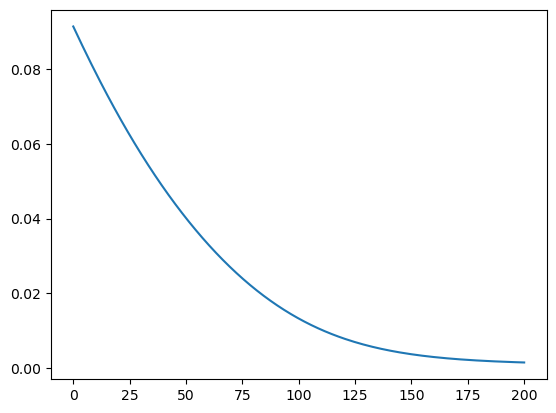

In [6]:
import torch 
import torch.nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt

x = (torch.linspace(-1,1,100))


x = torch.unsqueeze(torch.linspace(-1,1,100), dim =1) #i add i dimension to the tensor so instead of having a list of 100 element now i add a column by unsqueezing dimension 1
#so i get a 100x1 vector
print(x)
print('----')
y = torch.sin(x) #just apply sin to 100x1 tensor
print(y)

class NNsimple(nn.Module): 
    def __init__(self):
        super().__init__() #initiate/create the object
        self.input_layer = nn.Linear(1,10)
        self.output_layer = nn.Linear(10,1)

        #now that we have defined our 2 layers we need to tell the class how to pass the information forward
  

    def forward(self,x):
        #we want to activate from input layer to output layer
        pre_activations = self.input_layer(x)
        activations = torch.relu(pre_activations)
        predictions = self.output_layer(activations)
        return predictions # for a resnet we would return predictions + x

epochs = 200 
loss_nn = nn.MSELoss()

nn_Adam = NNsimple()
optimizer_adam = optim.Adam(nn_Adam.parameters())
losses = []
for epoch in range(epochs) : 
    optimizer_adam.zero_grad()
    predictions = nn_Adam(x)

    loss = loss_nn(predictions,y)
    losses.append(loss.item())

    loss.backward()

    optimizer_adam.step()

breakpoint()
print(losses)


plt.plot(torch.linspace(0,200,200), losses)
plt.show()



## Simple NN for CLASSIFICATION

torch.Size([250, 2])
torch.Size([250, 1])
torch.Size([500, 2])
[0.6684530377388, 0.6561086773872375, 0.6442868709564209, 0.6329644322395325, 0.6221296191215515, 0.6117359399795532, 0.6017262935638428, 0.5920228362083435, 0.5825464725494385, 0.5732548832893372, 0.5640595555305481, 0.5548856258392334, 0.5456977486610413, 0.5364550352096558, 0.5271085500717163, 0.5176357626914978, 0.5080195665359497, 0.49825388193130493, 0.48833099007606506, 0.478261262178421, 0.4680592715740204, 0.45773494243621826, 0.4472930133342743, 0.43673622608184814, 0.4260709881782532, 0.41532671451568604, 0.4044959545135498, 0.39359214901924133, 0.38261744379997253, 0.3715982437133789, 0.36055758595466614, 0.34952056407928467, 0.33850720524787903, 0.32753390073776245, 0.31661978363990784, 0.3057924807071686, 0.29509758949279785, 0.2845577597618103, 0.27418169379234314, 0.2639915347099304, 0.25402188301086426, 0.24426962435245514, 0.23475420475006104, 0.22550587356090546, 0.21652065217494965, 0.20780116319656372, 

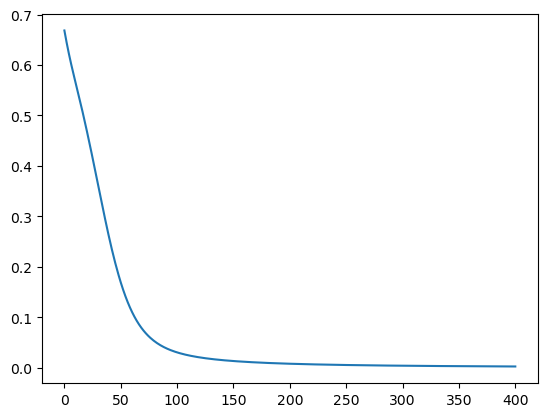

In [9]:
import torch 
import torch.nn as nn 
import torch.optim as optim
import matplotlib.pyplot as plt

n_samples = 500
#simulate 2 classes dataset : 
class0 = torch.randn(n_samples//2, 2)*0.2 + torch.tensor([0.0,0.0]) #create a 250x2 vector which is 250 random points [x,y] to which we add the point 0,0
class1 = torch.randn(n_samples//2, 2)*0.2 + torch.tensor([1.0, 1.0]) 
print(class1.shape)

target0 = torch.zeros(n_samples//2).unsqueeze(1)
target1 = torch.ones(n_samples//2).unsqueeze(1)
print(target0.shape)

X = torch.cat([class0,class1])
y = torch.cat([target0, target1], dim = 0)

print(X.shape)

class NNsimple(nn.Module): 
    def __init__(self):
        super().__init__() #initiate/create the object
        self.input_layer = nn.Linear(2,10)
        self.output_layer = nn.Linear(10,1)

        #now that we have defined our 2 layers we need to tell the class how to pass the information forward
  

    def forward(self,x):
        #we want to activate from input layer to output layer : we need to modify the activation function to work with classification tasks
        pre_activations = self.input_layer(x)
        activations = torch.relu(pre_activations) 
        output = self.output_layer(activations)
        prediction = torch.sigmoid(output)
        return prediction


epochs = 400
loss_nn = nn.BCELoss() #binary cross entropy loss for binary classifier 

nn_Adam = NNsimple()
optimizer_adam = optim.Adam(nn_Adam.parameters(), lr = 0.01)
losses = []
for epoch in range(epochs) : 
    optimizer_adam.zero_grad()
    predictions = nn_Adam(X)

    loss = loss_nn(predictions,y)
    losses.append(loss.item())

    loss.backward()

    optimizer_adam.step()

breakpoint()
print(losses)


plt.plot(torch.linspace(0,400,400), losses)
plt.show() 

## Not so Simple NN

### Exercise

In [ ]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



class flexibleMLP(nn.Module) : 
    def __init__(self, layers : list, scale : float = 1.0, bias_scale : float = 2.0, activation = nn.GELU()):
        super(flexibleMLP,self).__init__()
        #save arguments as attributes for later use 
        self.layer_sizes = layers
        self.scale = scale
        self.bias_scale = bias_scale
        self.activation_fn = activation

        #TODO : create modules to store our layers and activactions 
        

        #build network structure
        self.build_layers()
        self.reset_parameters()

        #initialize parameters 
        self.reset_parameters()
    
    def build_layers(self) : 
        #TODO : run a loop a create 2 linear layers and 1 output layer using layer sizes 
        #TODO: in the loop also add activations between input and first layer and between 1st and 2nd layer 
        #TODO : add identity layer to output layer
        for i in range(len(self.layer_sizes)-1) : #want to create the 3 layer sizes where layer_sizes= [input, nb_neurons_layer_1, nb_neurons_layer2, output]
           

    def reset_parameters(self): 
        for i, layer in enumerate(self.layers) : #enumerate loops through a list and gives : 1) index i  2) element i of the list
           #TODO : initialize layer weights and layer bias using normal with mean 0 and std bias/layer size 
            

    def forward(self, x , return_last_hidden = False ) : 
        #TODO : create forward path

        return predictions 






#we will simulate a vector of target 
np.random.seed(42)
beta_true = np.random.randn(10,1)

#simulate features : 1000 lines, 10 columns (10 lines like the target vector)
#TODO : Simulate random feature of 1000 lines and 10 columns

#TODO : simulate vector y by taking the cos of the matrix multiplication between beta and the random features
#TODO : Add noise to y :not forget to make sure our X and y are in tensor format




X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)

X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)
trainset = #TODO : Create trainset using some imported modules
testset = #TODO : Create testset using imported modules

batchsize = 32

train_loader = #TODO : Create appropriate train module using some imported modules and the batchsize
test_loader = #TODO 



model = #TODO Initiate the NN model 
#TODO : Create optimizer using adam optimizer optimizer and learning rate of your choice 
# TODO : Create loss function 

n_epochs = 400

for epoch in range(n_epochs) : 
    #TODO : Make predictions zebbbi 
    
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss on the last mini-batch was: {loss.item():.4f}')

#THIS IS ONLY THE TRAINING PART 
#We know want to evaluate the model : 
model.eval() #compulsory step to put the model in evalutation mode 
def get_predictions(loader) :
    targets = []
    predictions = []

    for features, target in loader : 
        targets.append(target.numpy())
        prediction = model(features)
        predictions.append(prediction.numpy()) 

    return predictions, targets

train_predictions, train_targets = get_predictions(train_loader)
test_predictions, test_targets = get_predictions(test_loader)

train_mse = (train_predictions- train_targets)**2/(np.mean(train_targets)**2)
test_mse = (test_predictions - test_targets)**2/(np.mean(test_targets)**2)


### Solution

In [10]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split



class flexibleMLP(nn.Module) : 
    def __init__(self, layers : list, scale : float = 1.0, bias_scale : float = 2.0, activation = nn.GELU()):
        super(flexibleMLP,self).__init__()
        #save arguments as attributes for later use 
        self.layer_sizes = layers
        self.scale = scale
        self.bias_scale = bias_scale
        self.activation_fn = activation

        #creates modules/list to store our layers and activactions 
        self.layers = nn.ModuleList()
        self.activations = nn.ModuleList()

        #build network structure
        self.build_layers()
        self.reset_parameters()

        #initialize parameters 
        self.reset_parameters()
    
    def build_layers(self) : 

        for i in range(len(self.layer_sizes)-1) : #want to create the 3 layer sizes where layer_sizes= [output, nb_neurons_layer_1, nb_neurons_layer2, output]
            layer = nn.Linear(self.layer_sizes[i], self.layer_sizes[i+1])
            self.layers.append(layer)

            #we have 3 linear layer and we to activate only first and second ones
            if i < (len(self.layer_sizes) - 2 ) : 
                activation = self.activation_fn
                self.activations.append(activation)
            else : 
                activation = nn.Identity()
                self.activations.append(activation)

    def reset_parameters(self): 
        for i, layer in enumerate(self.layers) : #enumerate loops through a list and gives : 1) index i  2) element i of the list
            nn.init.normal_(layer.weight, mean =0.0, std = self.scale*np.sqrt(1/self.layer_sizes[i]))
            nn.init.normal_(layer.bias, mean = 0.0, std = self.bias_scale*np.sqrt(1/self.layer_sizes[i]))

    def forward(self, x , return_last_hidden = False ) : 
        pre_activ = self.layers[0](x)
        activ1 = self.activations[0](pre_activ)

        pre_activ2 = self.layers[1](activ1)
        activ2 = self.activations[1](pre_activ2)
        predictions = self.layers[2](activ2)

        return predictions 


#set up the object and run a sample through it 



#we will simulate a vector of target 
np.random.seed(42)
beta_true = np.random.randn(10,1)

#simulate features : 1000 lines, 10 columns (10 lines like the target vector)
X = np.random.randn(1000,10)



epsilon = np.random.randn(1000,1)
y = np.cos(X@beta_true) + epsilon

X = torch.tensor(X, dtype = torch.float32) 
y = torch.tensor(y, dtype = torch.float32)

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train, dtype = torch.float32)

X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test, dtype = torch.float32)
trainset = TensorDataset(X_train,y_train)
testset = TensorDataset(X_test,y_test)

batchsize = 32

train_loader = DataLoader(trainset,batch_size= batchsize, shuffle= True)
test_loader = DataLoader(testset,batch_size = batchsize, shuffle=False)



model = flexibleMLP(layers=[10,640,640,1],scale = 2.0)
optimizer = torch.optim.Adam(model.parameters(),lr= 0.01)
criterion = nn.MSELoss()

n_epochs = 100

for epoch in range(n_epochs) : 
    for input,target in train_loader: 
        prediction = model(input)
        loss = criterion(prediction,target)

        #now that we got iteration 1 prediction, we need to propagate backward the information 
        #in order to be able to optimize and update the weights 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{n_epochs}], Loss on the last mini-batch was: {loss.item():.4f}')


model.eval() #compulsory step to put the model in evalutation mode 
def get_predictions(loader) :
    targets = []
    predictions = []
    with torch.no_grad():
        for features, target in loader : 
            targets.extend(target.numpy())
            prediction = model(features)
            predictions.extend(prediction.numpy()) 
    targets = np.array(targets).flatten()
    predictions = np.array(predictions).flatten()
    return predictions, targets

train_predictions, train_targets = get_predictions(train_loader)
test_predictions, test_targets = get_predictions(test_loader)

train_mse = (train_predictions- train_targets)**2/(np.mean(train_targets)**2)
test_mse = (test_predictions - test_targets)**2/(np.mean(test_targets)**2)

print(train_mse)
print(test_mse)


/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_62302/3696620686.py:82: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype = torch.float32)
/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_62302/3696620686.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype = torch.float32)
/var/folders/ft/f5drds915nl_7p2g4tg67z840000gn/T/ipykernel_62302/3696620686.py:85: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype = torch.flo

Epoch [20/100], Loss on the last mini-batch was: 0.6913
Epoch [40/100], Loss on the last mini-batch was: 0.2858
Epoch [60/100], Loss on the last mini-batch was: 0.2034
Epoch [80/100], Loss on the last mini-batch was: 0.1197
Epoch [100/100], Loss on the last mini-batch was: 0.1665
[1.40720634e+01 1.92755957e+03 7.83055353e+00 7.18934174e+01
 5.69850636e+00 1.68783661e+02 8.92492218e+01 4.09185883e+02
 1.55675110e+02 1.04886742e+01 5.13671448e+02 3.64528906e+03
 2.28731018e+02 5.24803711e+02 4.33064789e-01 7.16962097e+02
 2.29148895e+02 3.90366211e+01 2.05895288e+03 2.55770892e-01
 4.56918518e+02 1.08173694e+03 3.94259125e+02 3.96482048e+01
 1.08302795e+03 3.99833557e+02 4.67553619e+02 1.43396313e+03
 1.67052388e+00 2.49022293e+02 1.45738373e+02 1.67729950e+01
 1.86844894e+02 2.57864594e+02 1.00040543e+00 6.85001038e+02
 1.33650150e+01 1.84365463e+02 1.07651233e+03 2.42052630e-01
 9.69794983e+02 8.88585022e+02 7.74799347e+01 1.08134186e+02
 7.26006897e+02 3.06552795e+02 2.70444580e+02 5.

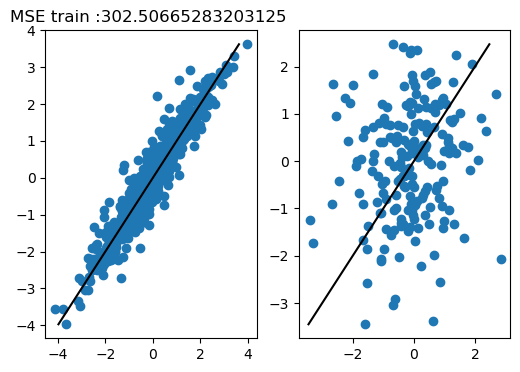

In [20]:
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,2,figsize = (6,4))

axs[0].scatter(train_predictions, train_targets)
axs[0].plot([train_targets.min(), train_targets.max()],[train_targets.min(), train_targets.max()], color = 'black')
axs[0].set_title(f"MSE train :{np.mean(train_mse)} ")

axs[1].scatter(test_predictions, test_targets)
axs[1].plot([test_targets.min(),test_targets.max()],[test_targets.min(), test_targets.max()], color = 'black')


##  Transformers and tokenizers

In [ ]:
import pandas as pd
import numpy as np
import torch
from sklearn.linear_model import LinearRegression

#first step is always to import transformers , Autotokenizer and and AutoModel
from transformers import AutoTokenizer, AutoModel

#then we need to provide the path to our LLM chatbot 
model_path = "/var/pcache/tinyllama-1.1b-chat"

#then load the tokenizer 
tokenizer = AutoTokenizer.from_pretrained(model_path)

#then load the model 
model = AutoModel.from_pretrained(model_path)

# Define a new test sentence
test_sentence = "The company reported strong earnings and raised its guidance for the year."

#tokenize and embed the test sentence
test_inputs = tokenizer(test_sentence, padding = True, truncation = True, max_length = 128, return_tensors = "pt")
test_outputs = model(**test_inputs)
test_embedding = test_outputs.last_hidden_state.mean(dim = 1)


# Define sample data
sample_texts = [
    "Earnings beat expectations for the third quarter.",
    "The company announced a share buyback program.",
    "Market reacts negatively to CEO's resignation.",
    "Revenue growth slows down in the second half.",
    "Positive outlook for the next fiscal year.",
    "Unexpected losses reported in the energy sector.",
    "Strong performance driven by international markets.",
    "Regulatory issues impact quarterly profits.",
    "Investors optimistic about new product launch.",
    "Weak demand leads to lower guidance.",
    "Executives disclosed market volatility amid inflation concerns.",
    "The market foresees a new product launch despite global headwinds.",
    "Investors warned about a potential merger in response to investor pressure.",
    "The board expects strategic expansion in the next quarter.",
    "The firm raised weaker revenue guidance after recent acquisitions.",
    "The market confirmed cost-cutting measures due to macroeconomic conditions.",
    "Analysts foresees strong quarterly earnings in the coming months.",
    "The board announced cost-cutting measures following a strong performance in Asia.",
    "The CEO projected cost-cutting measures after recent acquisitions.",
    "Executives disclosed strong quarterly earnings despite global headwinds."
]

sample_targets = [
    0.548, 0.598, -0.995, -0.542, 0.737, -0.584, 0.517, -0.347, 0.533, -0.326,
    -0.366, 0.534, -0.689, 0.326, -0.849, 0.826, 0.511, 0.741, 0.395, 0.970
]

df = pd.DataFrame({
    "text" : sample_texts, 
    "target" : sample_targets})

inputs = tokenizer(sample_texts, padding = True, truncation = True, max_length = 128, return_tensors = "pt")
outputs = model(**inputs)
embeddings = outputs.last_hidden_state.mean(dim = 1)

X = embeddings.numpy()
y = np.array(sample_targets)

linear_reg = LinearRegression()
linear_reg = linear_reg.fit(X,y)

predicted_targets = linear_reg.predict(test_embedding.numpy())


